# title: "FINC621 Winter 2018-19 Lab Worksheet 02"

## author: "Yu Jia"

## date: "11-20-2018"

## subtitle: Time Series Distributions & Normality (finc621-lab02)

### About

This worksheet has three main taks: analyze the time series of returns, assess for normal distribution, and check for exponential behavior of prices time series.

### Setup

Remember to always set your working directory to the source file location. Go to 'Session', scroll down to 'Set Working Directory', and click 'To Source File Location'. Read carefully the below and follow the instructions to complete the tasks and answer any questions.  Submit your work to RPubs as detailed in previous notes. 

### Note

For clarity, tasks/questions to be completed/answered are highlighted in red color (color visible only in preview mode) and numbered according to their particular placement in the task section.  Type your answers outside the red color tags!

Quite often you will need to add your own code chunk. Execute sequentially all code chunks, preview, publish, and submit link on Sakai following the naming convention. Make sure to add comments to your code where appropriate. Use own language!

**Any sign of plagiarism, will result in dissmissal of work!**

### Task 1: Plot of Returns & Testing for Normality Distribution

<font color=red> ##### 1A) Follow the instructions on p.41 to generate four plots for daily, daily log, weekly, and monthly returns. Select a stock of your choice and a time period long enough (5-10 years) to capture the returns behavior.</font>

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt


In [2]:
# the fix_yahoo is an alternative method to gain data, but yahoo finance sometimes doesn't provide some data.
'''import sys
!{sys.executable} -m pip install fix_yahoo_finance '''
# import fix_yahoo_finance as yf
# df=yf.download('GE', start='2004-12-30', end='2017-12-01')
# df.head()

'import sys\n!{sys.executable} -m pip install fix_yahoo_finance '

In [3]:
# gain the AMZN data
start=dt.datetime(2007,1,1)
end=dt.datetime(2018,12,31)
amzn=web.DataReader('AMZN','yahoo',start,end)

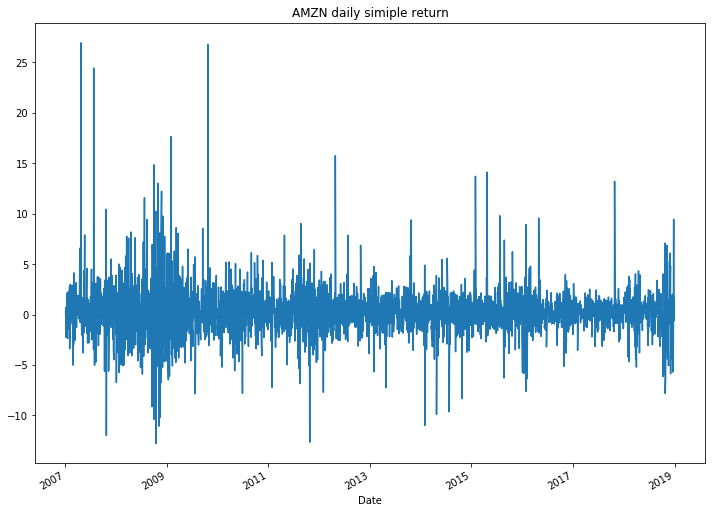

In [4]:
# daily simiple return
amzndr=amzn['Adj Close'].pct_change()*100
amzndr.plot(figsize=(12,9))
plt.title('AMZN daily simiple return')
plt.show()

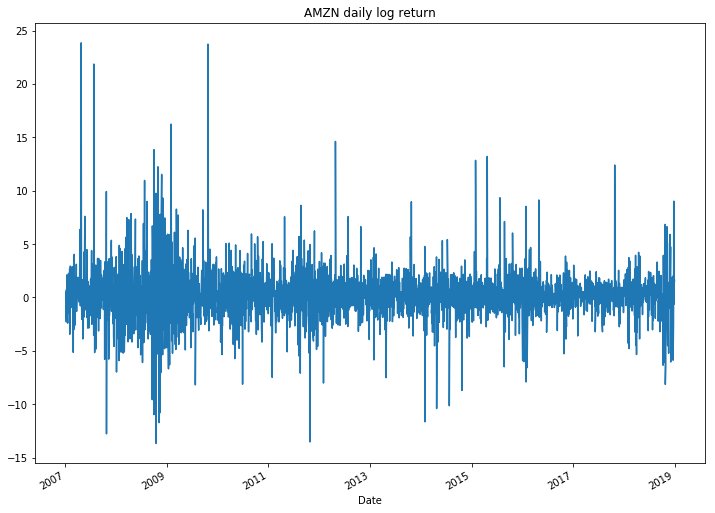

In [5]:
# daily log return of amzn
amzndlr=np.log(amzn['Adj Close']).diff()*100
amzndlr.plot(figsize=(12,9))
plt.title('AMZN daily log return')
plt.show()

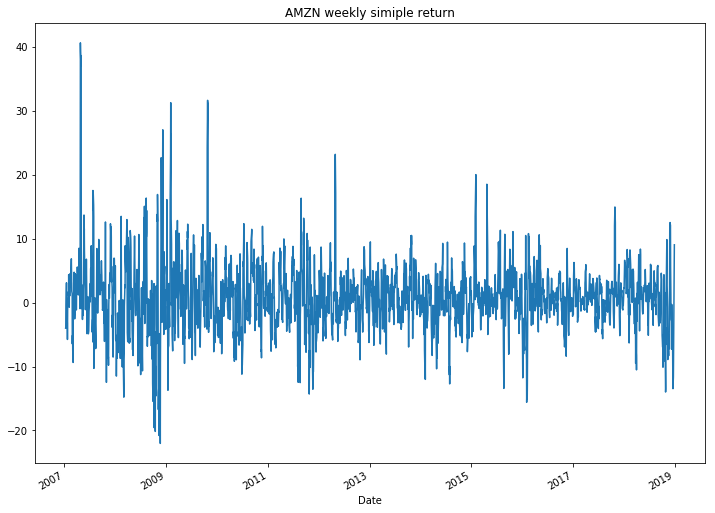

In [6]:
# amzn weekly simiple return
amznwr=amzn['Adj Close'].pct_change(periods=5)*100
amznwr.plot(figsize=(12,9))
plt.title('AMZN weekly simiple return')
plt.show()

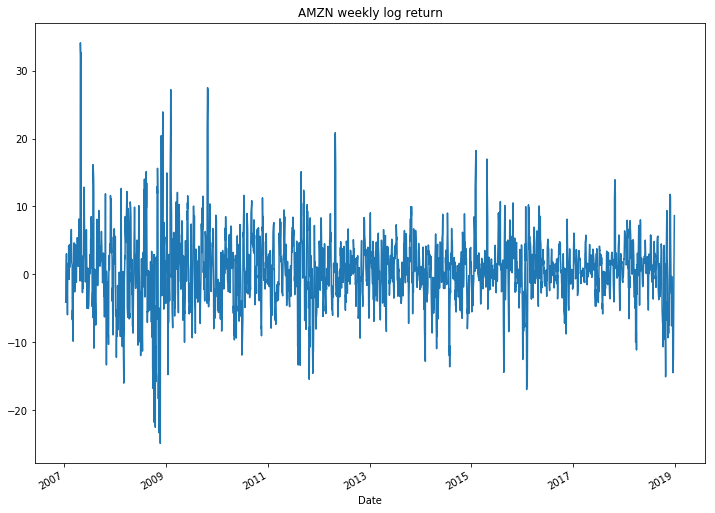

In [7]:
# weekly log return of amzn
amznwlr=np.log(amzn['Adj Close']).diff(periods=5)*100
amznwlr.plot(figsize=(12,9))
plt.title('AMZN weekly log return')
plt.show()

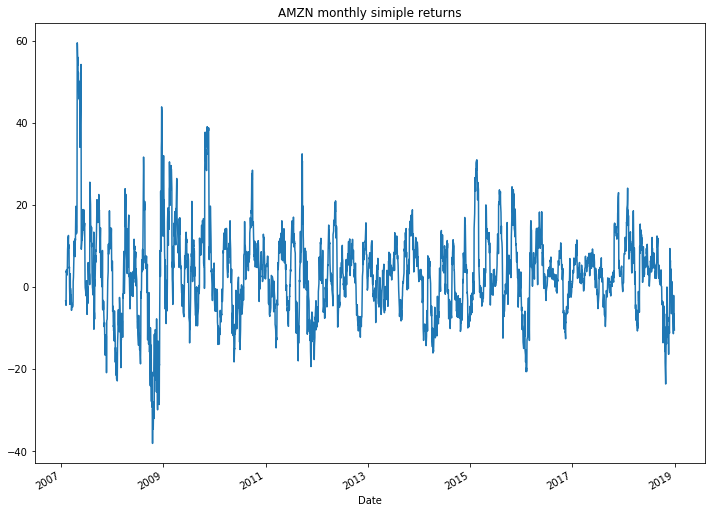

In [8]:
# amzn monthly simiple return
amznmr=amzn['Adj Close'].pct_change(periods=21)*100
amznmr.plot(figsize=(12,9))
plt.title('AMZN monthly simiple returns')
plt.show()

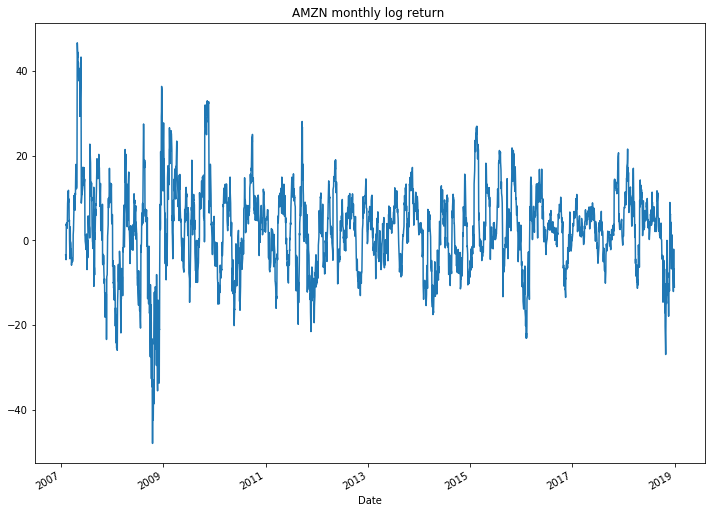

In [9]:
# monthly log return of amzn
amznmlr=np.log(amzn['Adj Close']).diff(periods=21)*100
amznmlr.plot(figsize=(12,9))
plt.title('AMZN monthly log return ')
plt.show()


<font color=red> ##### 1B) For the case of **daily log returns**  only, write down the mathematical formula representing the calculation in the code. Confirm integrity of your mathematical formula by selecting a recent data point from your time series object, substituting the corresponding values in the formula to manually calculate the log return, and comparing both results. </font>

$$ r=ln(1+R_t) $$
$$ ln(1+R_t)=lnp_t-lnp_{t-1}=ln1593.41-ln1619.44 $$
$$ t=2018-11-16 $$
$$ r=-1.62 $$ 

In [10]:
amzn['2018-11-15':'2018-11-16']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-15,1624.819946,1546.510010,1581.01001,1619.439941,8427300,1619.439941
2018-11-16,1614.479980,1573.119995,1587.50000,1593.410034,6066100,1593.410034


In [11]:
# amzn daily log return at 2018-11-16
amzndlr['2018-11-16':'2018-11-16']

Date
2018-11-16   -1.620398
Name: Adj Close, dtype: float64

<font color=red> ##### 1C) Check the normality of the **daily returns** using the R function `qqnorm()` to generate a Q-Q plot. For the function to work properly, you will need to extract first the numeric values from the time series object. Note that a time series object contains both a date and a corresponding value. To extract the numerical value only, on can use the R function `as.numeric()` on the time series object. Explain what the Y and X axis of the Q-Q plot represent, and share your observation on the normality of the returns distribution.<\font>

In [12]:
import sys
!{sys.executable} -m pip install statsmodels

In [13]:
import statsmodels.api as sm

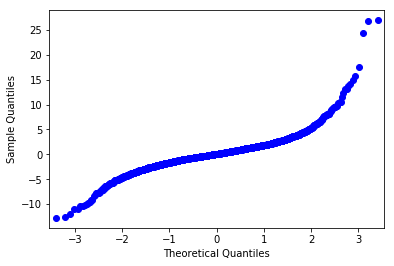

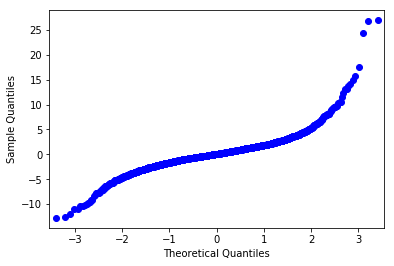

In [14]:
sm.qqplot(amzndr.dropna())

### Task 2: Density Distribution

Another way to assess the normality of a distribution, other than a Q-Q plot, is to look at the actual density distribution and compare to a normal distribution.

<font color=red> ##### 2A) Follow the example in R Lab 2.7.9/p. 70 to generate the density distribution for your stock of choice. Comment on your results.</font>

In [15]:
import sys
!{sys.executable} -m pip install seaborn

In [16]:
import sys
!{sys.executable} -m pip install scipy

In [17]:
import seaborn as sns
import matplotlib.lines
import scipy.stats as stats
from scipy.stats import norm

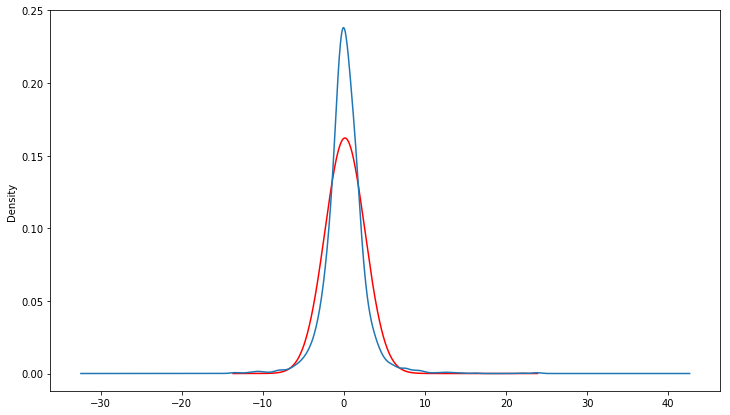

In [18]:
values=amzndlr.dropna()
# create x-axis
x_axis=np.linspace(values.min(),values.max(),len(values))
# loc is the mean, scale is the standard deviation
loc,scale=stats.norm.fit(values)
param_density=stats.norm.pdf(x_axis,loc=loc,scale=scale)
# plot distribution of amzn's daily log return 
fig,ax=plt.subplots(figsize=(12,7))
ax.plot(x_axis,param_density,'r-')
ax = amzndlr.plot.kde()

The more data in densty of amzn's return concetrate on mean than data in normal distribution does

### Task 3: Exponential Behavior of Prices & Curve Fitting

In general, the price history of a stock, over a sufficiently large time window, tends to follow an exponential curve. Many other economic indicators like GDP, population growth, and inflation also follow exponential growth over a long time. Keep in mind that for investment purposes we care more about returns and not prices.


<font color=red> ##### 3A) Follow the example in R Lab 2.7.2/p. 67 or R Labs 2 from book’s website (*) to generate an exponential fit for the Dow Jones Industrial Average DJIA. In case the suggested command in the book does not work, consider using instead the command in the code chunk below to capture the DIJA prices.</font>

In [19]:
import statsmodels.api as sm
import fix_yahoo_finance as yf

In [20]:
dji=yf.download('^DJI','2007-01-31','2018-11-19')
dji.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-31,12520.030273,12657.019531,12505.200195,12621.690430,12621.690430,258410000
2007-02-01,12617.200195,12682.570313,12616.080078,12673.679688,12673.679688,235130000
2007-02-02,12673.839844,12683.929688,12638.349609,12653.490234,12653.490234,203610000
2007-02-05,12653.410156,12681.209961,12629.860352,12661.740234,12661.740234,204140000
2007-02-06,12661.660156,12680.570313,12633.940430,12666.309570,12666.309570,201010000


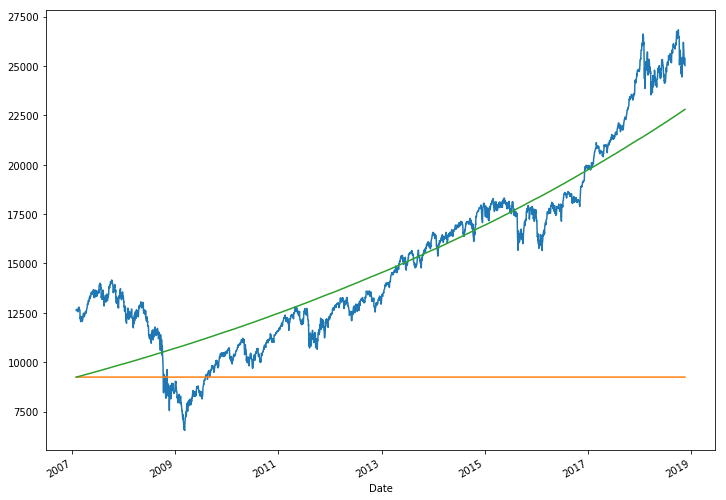

In [28]:
# plot Dow Jones Industrial Average dji
dji['Adj Close'].plot(figsize=(12,9))
# check dataframe
type(dji)
# time series 
djiseries=dji.index.values
# create index of regression
x=[ x for x in range(0,len(dji['Adj Close']),1)]
# log price from DJI
y=np.log(dji['Adj Close'])
# conver pandas dataframe to list
z=list(y.values.T.flatten())
# change x dateframe 
x=sm.add_constant(x)
# linear regression 
model=sm.OLS(z,x)
results=model.fit()
# coefficients intercept and x
results.params
# create exponential 
expo=np.exp(results.params[0]+results.params[1]*x)
# plot exponential graph
plt.plot(djiseries,expo)

<font color=red>##### 3B) Write down the mathematical form representing the exponential function in the code. Substitute for the exact coefficients in the exponential form and clearly label the variables in the function, in particular the time index.</font>

$$P_=t=e^(a*x+b)$$
$$lnP_t=ax+b$$
$$a=0.001092;$$
$$b=2.716408;$$
$$t=2012-11-01,x=85.22$$

<font color=red>##### 3C) Repeat the  exercise in 3A) for AAPL Adjusted prices.</font>